<center><img src="https://github.com/DACSS-CSSmeths/guidelines/blob/main/pics/small_logo_ccs_meths.jpg?raw=true" width="700"></center>







-------

# Spatial AutoCorrelation.



## I. Getting ready


### Libraries needed

Let's verify:

In [1]:
## !pip install pysal
## !pip show pysal pandas geopandas

In [2]:
## needed in Colab
# !pip install pysal

### The Data

The URLS from GitHub

In [3]:
# you should write your own links
LinkUS="https://github.com/DACSS-CSSmeths-winter/spatialtest/raw/refs/heads/main/cb_2023_us_state_500k.zip"
LinkPeru="https://github.com/DACSS-CSSmeths-winter/spatialtest/raw/refs/heads/main/PeruMaps.gpkg"

Reading the maps:

In [4]:
import geopandas as gpd

us_states = gpd.read_file(LinkUS)
peru=gpd.read_file(LinkPeru,layer='good_geom')


In [60]:
us_states.head()

,STATEFP,STATENS,GEOIDFQ,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,35,00897535,0400000US35,35,NM,New Mexico,00,314198587197,726463919,"POLYGON ((-109.05017 31.48, -109.04984 31.4995..."
1,46,01785534,0400000US46,46,SD,South Dakota,00,196341525171,3387709166,"POLYGON ((-104.05788 44.9976, -104.05078 44.99..."
2,06,01779778,0400000US06,06,CA,California,00,403673296401,20291770234,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."
3,21,01779786,0400000US21,21,KY,Kentucky,00,102266598312,2384223544,"MULTIPOLYGON (((-89.40565 36.52816, -89.39868 ..."
4,01,01779775,0400000US01,01,AL,Alabama,00,131185049346,4582326383,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."


Checking:

* the crs
* confirming crs is projected
* geom(s) type
* usual: data types and num rows and columns



In [6]:
# Notice this map has very basic information per state:
us_states.crs.to_epsg(),\
us_states.crs.is_projected, \
set(us_states.geom_type),\
us_states.dtypes, \
us_states.shape

(4269,
 False,
 {'MultiPolygon', 'Polygon'},
 STATEFP       object
 STATENS       object
 GEOIDFQ       object
 GEOID         object
 STUSPS        object
 NAME          object
 LSAD          object
 ALAND          int64
 AWATER         int64
 geometry    geometry
 dtype: object,
 (56, 10))

In [7]:
# This is a map of Peru, at the **'distrito'** level (similar to municipality in the USA - not exactly the same).
# Some columns with **social data**  are included.
peru.crs.to_epsg(),\
peru.crs.is_projected, \
set(peru.geom_type),\
peru.dtypes, \
peru.shape

(4326,
 False,
 {'MultiPolygon'},
 DEPARTAMENTO                  object
 PROVINCIA                     object
 DISTRITO                      object
 ubigeo                        object
 Poblacion                      int64
 IDH2019                      float64
 Educ_sec_comp2019_pct        float64
 NBI2017_pct                  float64
 Viv_sin_serv_hig2017_pct     float64
 geometry                    geometry
 dtype: object,
 (1873, 10))

Taking a look:

In [8]:
us_states.head()

,STATEFP,STATENS,GEOIDFQ,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,35,00897535,0400000US35,35,NM,New Mexico,00,314198587197,726463919,"POLYGON ((-109.05017 31.48, -109.04984 31.4995..."
1,46,01785534,0400000US46,46,SD,South Dakota,00,196341525171,3387709166,"POLYGON ((-104.05788 44.9976, -104.05078 44.99..."
2,06,01779778,0400000US06,06,CA,California,00,403673296401,20291770234,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."
3,21,01779786,0400000US21,21,KY,Kentucky,00,102266598312,2384223544,"MULTIPOLYGON (((-89.40565 36.52816, -89.39868 ..."
4,01,01779775,0400000US01,01,AL,Alabama,00,131185049346,4582326383,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."


Let's reproject the crs:

<Axes: >

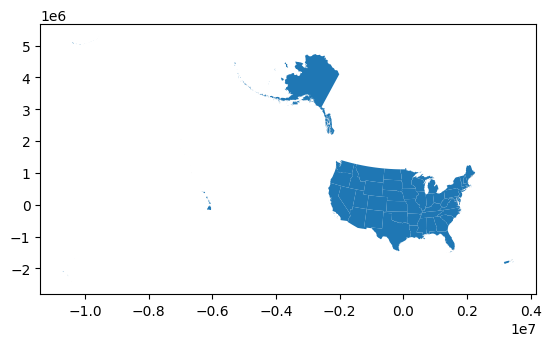

In [9]:
us_states=us_states.to_crs('ESRI:102004')
us_states.plot()

**Column as row index:**

Let's use the state name **as index**, that would help an easier identification of the places when we see most outputs (otherwise we will see just numerical indexes) :

In [10]:
us_states.set_index('NAME', inplace=True)
us_states.head()

,STATEFP,STATENS,GEOIDFQ,GEOID,STUSPS,LSAD,ALAND,AWATER,geometry
NAME,,,,,,,,,
New Mexico,35,00897535,0400000US35,35,NM,00,314198587197,726463919,"POLYGON ((-1239550.732 -742998.602, -1239209.0..."
South Dakota,46,01785534,0400000US46,46,SD,00,196341525171,3387709166,"POLYGON ((-634529.595 691870.23, -633970.523 6..."
California,06,01779778,0400000US06,06,CA,00,403673296401,20291770234,"MULTIPOLYGON (((-2077677.187 -350556.345, -207..."
Kentucky,21,01779786,0400000US21,21,KY,00,102266598312,2384223544,"MULTIPOLYGON (((587416.801 -251626.146, 587922..."
Alabama,01,01779775,0400000US01,01,AL,00,131185049346,4582326383,"MULTIPOLYGON (((765894.387 -906973.226, 766096..."


Let's keep some states, which will help visuallly in most examples:

In [11]:
someStates=['Utah','Colorado','Arizona','New Mexico', 'Florida','Georgia','Alabama']
sub_us=us_states[us_states.index.isin(someStates)]
sub_us

,STATEFP,STATENS,GEOIDFQ,GEOID,STUSPS,LSAD,ALAND,AWATER,geometry
NAME,,,,,,,,,
New Mexico,35,00897535,0400000US35,35,NM,00,314198587197,726463919,"POLYGON ((-1239550.732 -742998.602, -1239209.0..."
Alabama,01,01779775,0400000US01,01,AL,00,131185049346,4582326383,"MULTIPOLYGON (((765894.387 -906973.226, 766096..."
Georgia,13,01705317,0400000US13,13,GA,00,149485311347,4419673221,"MULTIPOLYGON (((1399991.224 -737657.398, 14001..."
Colorado,08,01779779,0400000US08,08,CO,00,268418756810,1185758065,"POLYGON ((-1127652.758 36934.786, -1125685.423..."
Utah,49,01455989,0400000US49,49,UT,00,213921849163,5963196691,"POLYGON ((-1575778.575 1668.504, -1575475.026 ..."
Florida,12,00294478,0400000US12,12,FL,00,138963763779,45970528648,"MULTIPOLYGON (((1616193.979 -1358524.655, 1616..."
Arizona,04,01779777,0400000US04,04,AZ,00,294366106734,854003932,"POLYGON ((-1757126.337 -535371.824, -1756922.2..."


Let's reproject and plot Peru's map:

<Axes: >

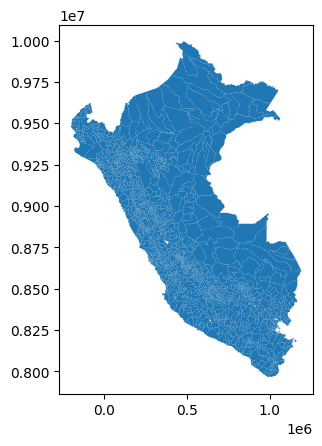

In [12]:
peru=peru.to_crs(5387)
peru.plot()

Besides the spatial units (DEPARTAMEN, PROVINCIA, DISTRITO, and Ubigeo - "Ubigeo" is a code ), you have:
 - **Poblacion**: Population (2017)
 - **Superficie**: Area               
 - **IDH2019**: Human Development Index for DISTRITO (2019)                   
 - **Educ_sec_comp2019_pct**: Share of Population that finished High-School (2019)     
 - **NBI2017_pct**: Share of Population with poverty at the household level aggregated by DISTRITO. This index ("Unsatisfied Basic Needs") uses observable living conditions rather than income alone (2017).
 - **Viv_sin_serv_hig2017_pct**: Share of housing units that have no sanitation infrastructure aggregated by  DISTRITO (2017)

The last two sections (III and IV) will need these **social data**.


Notice we should not use the 'distrito' name as index for the whole country, because several of them are repeated:

In [13]:
peru[peru['DISTRITO'].duplicated()]

,DEPARTAMENTO,PROVINCIA,DISTRITO,ubigeo,Poblacion,IDH2019,Educ_sec_comp2019_pct,NBI2017_pct,Viv_sin_serv_hig2017_pct,geometry
9,Junin,CONCEPCION,ACO,PE120202,1592,0.377311,57.335334,27.3,21.4,"MULTIPOLYGON (((457197.516 8681592.724, 457222..."
11,Huancavelica,ACOBAMBA,ACOBAMBA,PE090201,10258,0.449410,62.337880,21.3,10.3,"MULTIPOLYGON (((550033.762 8590870.065, 550087..."
12,Junin,TARMA,ACOBAMBA,PE120702,13586,0.419982,65.529955,25.7,15.1,"MULTIPOLYGON (((432097.658 8749658.967, 432167..."
63,Huancavelica,CHURCAMPA,ANCO,PE090502,6609,0.266987,57.909891,47.5,26.6,"MULTIPOLYGON (((553957.954 8603511.943, 553833..."
67,Huancavelica,ACOBAMBA,ANDABAMBA,PE090202,5758,0.197030,44.349191,36.3,21.6,"MULTIPOLYGON (((539528.942 8601674.274, 539606..."
...,...,...,...,...,...,...,...,...,...,...
1812,Ica,NAZCA,VISTA ALEGRE,PE110305,15935,0.592484,71.336705,30.0,4.9,"MULTIPOLYGON (((535073.144 8355065.183, 535260..."
1826,Pasco,PASCO,YANACANCHA,PE190113,30792,0.619342,80.494327,18.3,7.5,"MULTIPOLYGON (((370987.224 8836176.586, 370988..."
1844,Junin,JAUJA,YAULI,PE120433,1304,0.467765,70.021885,22.3,19.8,"MULTIPOLYGON (((454474.103 8711895.68, 454511...."
1845,Junin,YAULI,YAULI,PE120810,5113,0.704505,68.745549,22.6,7.1,"MULTIPOLYGON (((392481.696 8714910.767, 392467..."


Let's keep one, **Cusco**:

In [14]:
cusco=peru[peru['DEPARTAMENTO']=='Cusco']
cusco

,DEPARTAMENTO,PROVINCIA,DISTRITO,ubigeo,Poblacion,IDH2019,Educ_sec_comp2019_pct,NBI2017_pct,Viv_sin_serv_hig2017_pct,geometry
4,Cusco,PARURO,ACCHA,PE081002,3839,0.300626,64.586647,28.6,11.1,"MULTIPOLYGON (((844856.74 8458336.092, 844867...."
17,Cusco,ACOMAYO,ACOMAYO,PE080201,5627,0.348009,60.402557,30.9,12.4,"MULTIPOLYGON (((863532.475 8467943.097, 863571..."
19,Cusco,ACOMAYO,ACOPIA,PE080202,2336,0.286885,77.912100,30.9,16.4,"MULTIPOLYGON (((883266.748 8443726.107, 883244..."
22,Cusco,ACOMAYO,ACOS,PE080203,2286,0.285454,48.468369,29.4,12.0,"MULTIPOLYGON (((853185.708 8464205.961, 853388..."
47,Cusco,ESPINAR,ALTO PICHIGUA,PE080808,3171,0.336571,51.559102,27.1,17.6,"MULTIPOLYGON (((918304.592 8376916.873, 918335..."
...,...,...,...,...,...,...,...,...,...,...
1831,Cusco,CANAS,YANAOCA,PE080501,10178,0.288275,62.647237,32.5,16.2,"MULTIPOLYGON (((882972.53 8429638.335, 883893...."
1834,Cusco,CALCA,YANATILE,PE080408,13588,0.345829,58.361387,37.7,14.8,"MULTIPOLYGON (((836634.597 8590342.699, 836690..."
1846,Cusco,PARURO,YAURISQUE,PE081009,2522,0.266864,60.635464,26.5,12.5,"MULTIPOLYGON (((834842.193 8495007.963, 834810..."
1855,Cusco,URUBAMBA,YUCAY,PE081307,3390,0.646744,67.525945,16.7,3.6,"MULTIPOLYGON (((819904.562 8531751.422, 819815..."


In [15]:
# any duplicate names in distrito?
cusco[cusco['DISTRITO'].duplicated()]

,DEPARTAMENTO,PROVINCIA,DISTRITO,ubigeo,Poblacion,IDH2019,Educ_sec_comp2019_pct,NBI2017_pct,Viv_sin_serv_hig2017_pct,geometry


In [16]:
#then
cusco.set_index('DISTRITO', inplace=True)

## II. Neighborhood


Activate PYSAL (*libpysal*):

In [17]:
from libpysal.graph import Graph

Set random seed for reproducibility:

In [18]:
from numpy.random import seed
seed(42)

### II.1 Contiguity


#### II.1.A. Rook

Let's use **sub_us** GDF:

In [19]:
rook_US=Graph.build_contiguity(sub_us,rook=True) # rook by default

Now let's check the ouput:

**a. adjacency**

In [20]:
rook_US.adjacency # shows you the neighbors

focal       neighbor  
New Mexico  Colorado      1
            Arizona       1
Alabama     Georgia       1
            Florida       1
Georgia     Alabama       1
            Florida       1
Colorado    New Mexico    1
            Utah          1
Utah        Colorado      1
            Arizona       1
Florida     Alabama       1
            Georgia       1
Arizona     New Mexico    1
            Utah          1
Name: weight, dtype: int64

The previous results shows only the neighbors of the focals, to recreate a wide format:

In [21]:
import pandas as pd
pd.DataFrame(rook_US.adjacency).unstack()

weight                                              
neighbor   New Mexico Alabama Georgia Colorado Utah Florida Arizona
focal                                                              
New Mexico        NaN     NaN     NaN      1.0  NaN     NaN     1.0
Alabama           NaN     NaN     1.0      NaN  NaN     1.0     NaN
Georgia           NaN     1.0     NaN      NaN  NaN     1.0     NaN
Colorado          1.0     NaN     NaN      NaN  1.0     NaN     NaN
Utah              NaN     NaN     NaN      1.0  NaN     NaN     1.0
Florida           NaN     1.0     1.0      NaN  NaN     NaN     NaN
Arizona           1.0     NaN     NaN      NaN  1.0     NaN     NaN

We generally fill those missing values (not a neighbor) with zero.

In [22]:
rook_US_Matrix=pd.DataFrame(rook_US.adjacency).unstack().fillna(0)
rook_US_Matrix

weight                                              
neighbor   New Mexico Alabama Georgia Colorado Utah Florida Arizona
focal                                                              
New Mexico        0.0     0.0     0.0      1.0  0.0     0.0     1.0
Alabama           0.0     0.0     1.0      0.0  0.0     1.0     0.0
Georgia           0.0     1.0     0.0      0.0  0.0     1.0     0.0
Colorado          1.0     0.0     0.0      0.0  1.0     0.0     0.0
Utah              0.0     0.0     0.0      1.0  0.0     0.0     1.0
Florida           0.0     1.0     1.0      0.0  0.0     0.0     0.0
Arizona           1.0     0.0     0.0      0.0  1.0     0.0     0.0

SInce we are going to use several times, we may create a custom procedure:

In [23]:
toWideMatrix=lambda g:pd.DataFrame(g.adjacency).unstack().fillna(0)

Notice we created this wide matrix for pedagogical purposes. It is a bad idea if you have many columns and rows.

**b. adjacency graph**

As we have a `GRAPH`, we can identify these neighborhood relationships via edges:

In [24]:
##this will be used several times:

#!pip install geopandas pandas numpy pysal libpysal esda matplotlib folium branca mapclassify
general_arguments=dict(gdf=sub_us,node_kws=dict(color='red'), edge_kws=dict(alpha=0.4,color='blue'),zoom_start = 6)

rook_US.explore(**general_arguments)

#### II.1.B. Queen


Let's see what we get:

**a. adjacency matrix**

In [25]:
queen_US=Graph.build_contiguity(sub_us,rook=False)

# applying our procedure:

queen_US_Matrix=toWideMatrix(queen_US)
queen_US_Matrix

weight                                              
neighbor   New Mexico Alabama Georgia Colorado Utah Florida Arizona
focal                                                              
New Mexico        0.0     0.0     0.0      1.0  1.0     0.0     1.0
Alabama           0.0     0.0     1.0      0.0  0.0     1.0     0.0
Georgia           0.0     1.0     0.0      0.0  0.0     1.0     0.0
Colorado          1.0     0.0     0.0      0.0  1.0     0.0     1.0
Utah              1.0     0.0     0.0      1.0  0.0     0.0     1.0
Florida           0.0     1.0     1.0      0.0  0.0     0.0     0.0
Arizona           1.0     0.0     0.0      1.0  1.0     0.0     0.0

**b. adjacency plot**

In [26]:
queen_US.explore(**general_arguments)


### II.2 Proximity


#### II.2.A. Nearest Neighbors


If assume K is 3:

**a. adjacency matrix**

In [27]:
knn3_US = Graph.build_knn(sub_us.representative_point(), # GDF
                                 k=3) # desired k

knn3_US_Matrix=toWideMatrix(knn3_US)
knn3_US_Matrix

weight                                              
neighbor   New Mexico Alabama Georgia Colorado Utah Florida Arizona
focal                                                              
New Mexico        0.0     0.0     0.0      1.0  1.0     0.0     1.0
Alabama           1.0     0.0     1.0      0.0  0.0     1.0     0.0
Georgia           0.0     1.0     0.0      1.0  0.0     1.0     0.0
Colorado          1.0     0.0     0.0      0.0  1.0     0.0     1.0
Utah              1.0     0.0     0.0      1.0  0.0     0.0     1.0
Florida           1.0     1.0     1.0      0.0  0.0     0.0     0.0
Arizona           1.0     0.0     0.0      1.0  1.0     0.0     0.0

**b. adjacency plot**

In [28]:
knn3_US.explore(**general_arguments)

#### II.2.B Within zone of influence


Let's assume a 750 km distance band:

In [29]:
band750k_US=Graph.build_distance_band(sub_us.representative_point(), threshold=750000)

band750k_US_Matrix=toWideMatrix(band750k_US)
band750k_US_Matrix

weight                                              
neighbor   New Mexico Alabama Georgia Colorado Utah Florida Arizona
focal                                                              
New Mexico        0.0     0.0     0.0      1.0  1.0     0.0     1.0
Alabama           0.0     0.0     1.0      0.0  0.0     1.0     0.0
Georgia           0.0     1.0     0.0      0.0  0.0     1.0     0.0
Colorado          1.0     0.0     0.0      0.0  1.0     0.0     0.0
Utah              1.0     0.0     0.0      1.0  0.0     0.0     1.0
Florida           0.0     1.0     1.0      0.0  0.0     0.0     0.0
Arizona           1.0     0.0     0.0      0.0  1.0     0.0     0.0

In [30]:
band750k_US.explore(**general_arguments)

## III. Normalization and Lags

### III. 1 Normalizing weights



Our matrices tell us which are neighbors, and some give us additional information related to the 'farness' of the identified neighbor. Let me compute the marginal values by row (sum):

In [31]:
allMx=[rook_US_Matrix.sum(axis=1),
       queen_US_Matrix.sum(axis=1),
       knn3_US_Matrix.sum(axis=1),
       band750k_US_Matrix.sum(axis=1)]
pd.concat(allMx,axis=1)

,0,1,2,3
focal,,,,
New Mexico,2.0,3.0,3.0,3.0
Alabama,2.0,2.0,3.0,2.0
Georgia,2.0,2.0,3.0,2.0
Colorado,2.0,3.0,3.0,2.0
Utah,2.0,3.0,3.0,3.0
Florida,2.0,2.0,3.0,2.0
Arizona,2.0,3.0,3.0,2.0


We know that no-neighbors have value zero in the matrix. Then, non-zero (binary or non-binary) values carries some weight .
However, they are currently not normalized (they do not add to 1 by row), which may bias further procedures as raw values may 'distort' mathematical modelling.

For example, this binary matrix is non-normalized:

In [32]:
queen_US_Matrix

weight                                              
neighbor   New Mexico Alabama Georgia Colorado Utah Florida Arizona
focal                                                              
New Mexico        0.0     0.0     0.0      1.0  1.0     0.0     1.0
Alabama           0.0     0.0     1.0      0.0  0.0     1.0     0.0
Georgia           0.0     1.0     0.0      0.0  0.0     1.0     0.0
Colorado          1.0     0.0     0.0      0.0  1.0     0.0     1.0
Utah              1.0     0.0     0.0      1.0  0.0     0.0     1.0
Florida           0.0     1.0     1.0      0.0  0.0     0.0     0.0
Arizona           1.0     0.0     0.0      1.0  1.0     0.0     0.0

But this  matrix is now normalized (by **r**ows):

In [33]:
toWideMatrix(queen_US.transform("r"))

weight                                                      
neighbor   New Mexico Alabama Georgia  Colorado      Utah Florida   Arizona
focal                                                                      
New Mexico   0.000000     0.0     0.0  0.333333  0.333333     0.0  0.333333
Alabama      0.000000     0.0     0.5  0.000000  0.000000     0.5  0.000000
Georgia      0.000000     0.5     0.0  0.000000  0.000000     0.5  0.000000
Colorado     0.333333     0.0     0.0  0.000000  0.333333     0.0  0.333333
Utah         0.333333     0.0     0.0  0.333333  0.000000     0.0  0.333333
Florida      0.000000     0.5     0.5  0.000000  0.000000     0.0  0.000000
Arizona      0.333333     0.0     0.0  0.333333  0.333333     0.0  0.000000

These new row-standardized matrices will serve a greater purpose: the computing of **spatial lags**.

### III. 2 Spatial Lag

**How are each of us doing related to...?**

This is "how each distrito is doing" related to HS education (share of population that completed high school):

In [34]:
cusco.Educ_sec_comp2019_pct.describe()

count    112.000000
mean      61.682938
std       11.654747
min       30.492884
25%       52.982563
50%       61.217681
75%       70.041348
max       82.894658
Name: Educ_sec_comp2019_pct, dtype: float64

See the choropleth (quantile bining):

<Axes: >

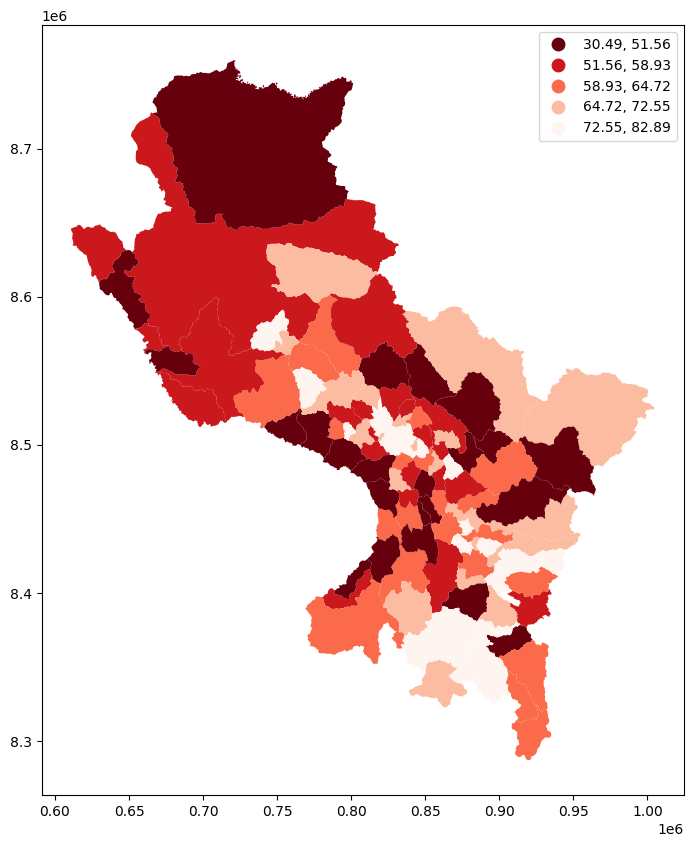

In [35]:
cusco.plot(
    "Educ_sec_comp2019_pct",
    scheme="quantiles",
    cmap="Reds_r",
    legend=True,figsize=(12, 10))

**How is the neighborhood doing related to...?**

Compute the neighborhood matrix:

In [36]:
cusco_queen=Graph.build_contiguity(cusco,rook=False)

When you gave no neighbors, you are an isolate (island). You can verify we do not have that:

In [37]:
#  "islands" may create trouble.
# Should you keep using a _contiguity_ approach, you may consider filtering those out
cusco_queen.isolates

Index([], dtype='object', name='focal')



Now, let's get the normalized matrix:

In [38]:
cusco_queen=cusco_queen.transform("r")

Then,  **the spatial lag of the variable** "Educ_sec_comp2019_pct" can be obtained like this:

In [39]:
ylag = cusco_queen.lag(cusco["Educ_sec_comp2019_pct"])

Let me add it to the GDF:

In [40]:
cusco=cusco.assign(Educ_sec_comp2019_pct_lagged=ylag)
cusco.head()

,DEPARTAMENTO,PROVINCIA,ubigeo,Poblacion,IDH2019,Educ_sec_comp2019_pct,NBI2017_pct,Viv_sin_serv_hig2017_pct,geometry,Educ_sec_comp2019_pct_lagged
DISTRITO,,,,,,,,,,
ACCHA,Cusco,PARURO,PE081002,3839,0.300626,64.586647,28.6,11.1,"MULTIPOLYGON (((844856.74 8458336.092, 844867....",48.546521
ACOMAYO,Cusco,ACOMAYO,PE080201,5627,0.348009,60.402557,30.9,12.4,"MULTIPOLYGON (((863532.475 8467943.097, 863571...",54.070684
ACOPIA,Cusco,ACOMAYO,PE080202,2336,0.286885,77.912100,30.9,16.4,"MULTIPOLYGON (((883266.748 8443726.107, 883244...",67.865034
ACOS,Cusco,ACOMAYO,PE080203,2286,0.285454,48.468369,29.4,12.0,"MULTIPOLYGON (((853185.708 8464205.961, 853388...",49.353838
ALTO PICHIGUA,Cusco,ESPINAR,PE080808,3171,0.336571,51.559102,27.1,17.6,"MULTIPOLYGON (((918304.592 8376916.873, 918335...",65.970222


Let's plot HS share against its lag:

<Axes: xlabel='Educ_sec_comp2019_pct', ylabel='Educ_sec_comp2019_pct_lagged'>

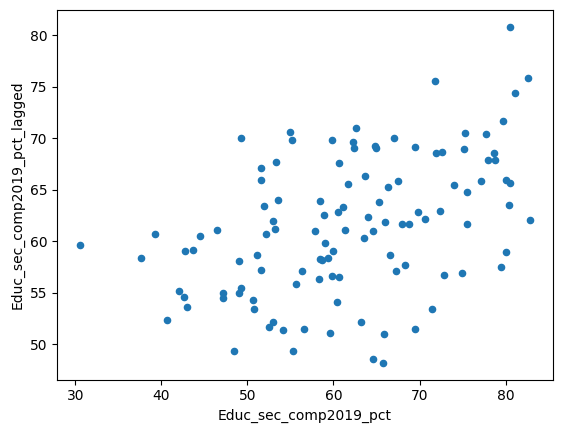

In [41]:
cusco.plot.scatter("Educ_sec_comp2019_pct","Educ_sec_comp2019_pct_lagged")

## IV. Spatial autocorrelation

### IV. 1 Global

A correlation plot as the previous one should let us know if a variable is correlated with values of the neighbors (the lag), and if that were the case,  proximity is interfering statistical analysis, as the variable values are not independent.

The most well known measure to confirm that is the Moran's I index of global spatial autocorrelation. Let's see the value we get:


In [42]:
import esda # from pysal

MoranGlobal_HS = esda.Moran(cusco['Educ_sec_comp2019_pct'], cusco_queen)

Once computed, you can retrieve its value and significance:

In [43]:
MoranGlobal_HS.I,MoranGlobal_HS.p_sim

(np.float64(0.2576064348240267), np.float64(0.001))

Moran’s I is interpreted like a Pearson r, but benchmarks are lower:

- |I| > 0.5 → **strong**; 0.2–0.5 → **moderate**; < 0.2 → **weak**.
- Sign indicates positive vs. negative spatial clustering.

Significance is assessed with a pseudo p-value from conditional randomisations of the data, because the theoretical null distribution is unknown for irregular spatial weights.

### IV. 2 Local

We can compute a Local Index of Spatial Association (LISA -local Moran) for each map polygon. That will help us find spatial clusters (spots) and spatial outliers:

- High-High (HH): values above average surrounded by values above average.These are also known as **hotSpot**s.
- Low-Low (LL): values below average surrounded by values below average. These are also known as **coldSpot**s.
- High-Low (HL): values above average surrounded by values below average.These are also known as **hotOutlier**s.
- Low-High (LH): values below average surrounded by values above average. These are also known as **coldOutlier**s.

It is also possible that no significant correlation is detected. Let's see those values:



a. Compute the LISAs:

In [44]:
lisa = esda.Moran_Local(cusco['Educ_sec_comp2019_pct'], cusco_queen)


b. Plot the results (**fast way**)

<Axes: >

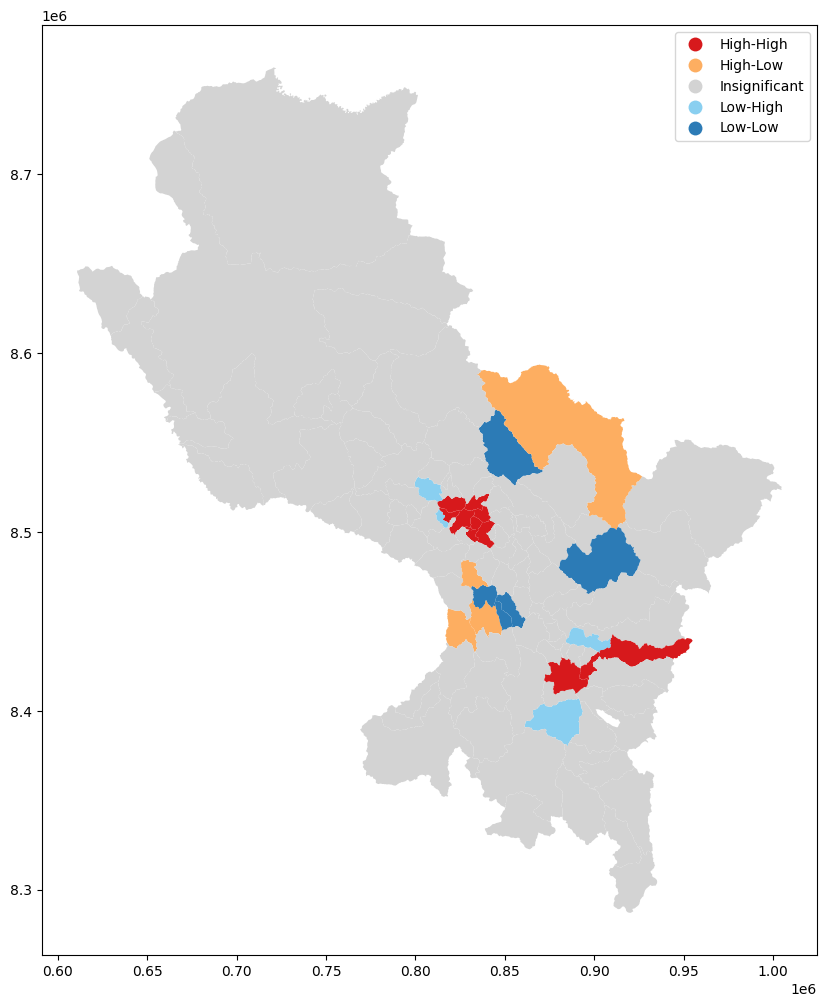

In [45]:
lisa.plot(cusco,crit_value=0.05,figsize=(10,13),legend=True)

#### IV. 2. 1 Analysis Local Spatial Correlation quadrants

You can not get the quadrant labels from the previous plot directly into the original GDF, thus complicating further analysis and exporting of those results.

First let's recover the labels into a new column:

In [46]:
# get the quadrants
cusco['HS_lisa'] = lisa.get_cluster_labels(crit_value=0.05)

In [47]:
# see the count
cusco['HS_lisa'].value_counts()

HS_lisa
Insignificant    89
High-High        10
Low-Low           5
High-Low          4
Low-High          4
Name: count, dtype: int64

Now, we can prepare a comparisson:

In [48]:
TheStats=["mean", "min", "max","var"]


# stats by the lisa cluster
grouped_stats = cusco.groupby('HS_lisa')['Educ_sec_comp2019_pct'].agg(TheStats)

# stats for the entire, ungrouped column
global_stats = cusco['Educ_sec_comp2019_pct'].agg(TheStats)

# Convert 'global_stats' (Series) to a DataFrame with an appropriate index name
global_stats_df = pd.DataFrame(global_stats).T
global_stats_df.index = ['Global/Total'] # simple but key

# Combine both
pd.concat([grouped_stats, global_stats_df])



,mean,min,max,var
High-High,75.013072,62.647237,82.659981,54.375209
High-Low,65.786398,63.190005,69.482961,7.285052
Insignificant,60.925442,30.492884,82.894658,132.119207
Low-High,54.821438,49.236568,59.828995,18.819172
Low-Low,50.712523,40.604106,59.596346,49.469968
Global/Total,61.682938,30.492884,82.894658,135.833125


From the results above, you may have several concerns and keep asking more questions:

- High-High clusters are concentrated areas of high percent of graduation from HighSchool. Is that expected in those areas? What has caused that? Has this been the same for a long time?

- Low-Low clusters are concentrated areas of low percent of graduation from HighSchool. What would it take to make a change in these areas? No doubt some kind of intervention is needed.

- High-Low clusters detect districts that outperform their neighbors. Can we leverage on those to improve the area? Are they in danger of worsening?

- Low-High clusters detect districts that are much worse than their neighbors, who are actually doing pretty well. Can we improve this place considering the surroundings need less intervention or not at all?

#### IV. 2. 2 Customizing Local Spatial Correlation quadrants

At this stage, we can rename the previous column to customize cluster labels and colors:

In [49]:
##knowing
cusco['HS_lisa'].unique()

array(['High-Low', 'Insignificant', 'Low-Low', 'High-High', 'Low-High'],
      dtype=object)

Keep in mind that the outliers may deserve more attention, so they may be at the top or bottom of the levels. You can add a number to achieve this purpose:

In [50]:
oldLabels=['Insignificant', 'Low-Low', 'High-High', 'High-Low', 'Low-High']

# 3 will be at the middle
newLabels = ['3 no_pattern', '4 coldSpot','2 hotSpot','1 hotOutlier' , '5 coldOutlier']

labels = dict(zip(oldLabels, newLabels))

labels

{'Insignificant': '3 no_pattern',
 'Low-Low': '4 coldSpot',
 'High-High': '2 hotSpot',
 'High-Low': '1 hotOutlier',
 'Low-High': '5 coldOutlier'}

Just using this dictionary to rename the column:

In [51]:

cusco.replace({'HS_lisa':labels},inplace=True)

## see the count
cusco['HS_lisa'].value_counts().sort_index()

HS_lisa
1 hotOutlier      4
2 hotSpot        10
3 no_pattern     89
4 coldSpot        5
5 coldOutlier     4
Name: count, dtype: int64

Finally, used that order to assign diverging color-blind safe palette:

<Axes: >

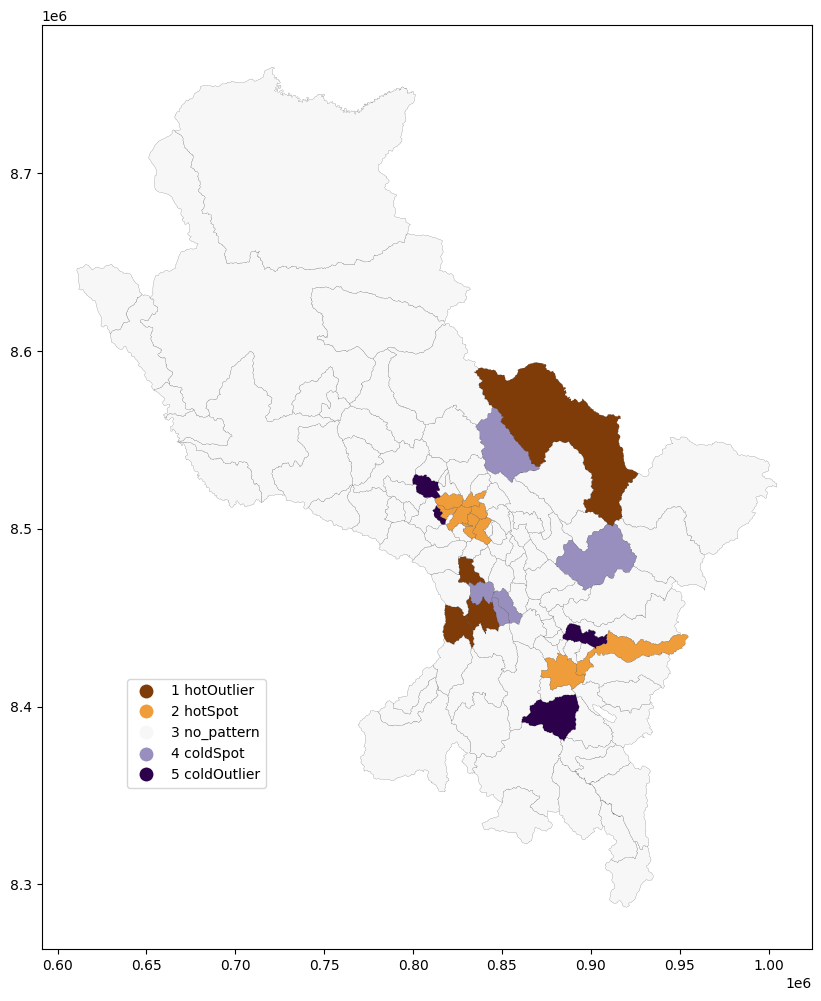

In [52]:
##custom colors- respect the previous order

import matplotlib.pyplot as plt
myColMap = plt.get_cmap('PuOr', 5)


##plot the map

cusco.plot(column='HS_lisa',
                categorical=True,
                cmap=myColMap,
                linewidth=0.1,
                edgecolor='k',
                legend=True,
                legend_kwds={'bbox_to_anchor': (0.3, 0.3)},
                figsize=(12,12))

In [53]:
cusco.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 112 entries, ACCHA to ZURITE
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   DEPARTAMENTO                  112 non-null    object  
 1   PROVINCIA                     112 non-null    object  
 2   ubigeo                        112 non-null    object  
 3   Poblacion                     112 non-null    int64   
 4   IDH2019                       112 non-null    float64 
 5   Educ_sec_comp2019_pct         112 non-null    float64 
 6   NBI2017_pct                   112 non-null    float64 
 7   Viv_sin_serv_hig2017_pct      112 non-null    float64 
 8   geometry                      112 non-null    geometry
 9   Educ_sec_comp2019_pct_lagged  112 non-null    float64 
 10  HS_lisa                       112 non-null    object  
dtypes: float64(5), geometry(1), int64(1), object(4)
memory usage: 14.6+ KB


In [54]:
cusco.to_file("cusco.geojson")

In [55]:
# cusco.explore(
#     column='HS_lisa',
#     cmap='PuOr',
#     categorical=True,
#     tooltip=['HS_lisa','DISTRITO'],
#     tiles='cartodbdarkmatter',
#     name='LISA Clusters'
# )